Ryan Timbrook
DataScience 450, Spring 2017
Assignment 2: Decisions Trees and Classiﬁcation Targeted Marketing Campaign

In this problem we will use historical data from past customer responses to build a classiﬁcation model. We will apply the trained model to a new set of prospects to whom we may want extend an offer for a PEP. Rather than doing a mass marketing campaign to all new prospects, we would like to target those that are likely to respond positively to our offer (according to our classiﬁcation model)

Use the dataset provided (comma delimited, and the ﬁrst row contains the ﬁeld names) - bank-data.csv  A. Open the .CSV ﬁle and inspect the attributes, is there one or more attributes that should be removed? If so, do it now.   B. Optional - You can choose to use the ARFF format or use CSV,  - Save the ﬁle in .ARFF format   - Load the .ARFF formatted data ﬁle  
C. Use Azure Machine Learning or a machine learning tool of your choice to build a classiﬁcation model. You can choose to use any of the classiﬁcation algorithms provided. 1. Evaluate your model accuracy.  
2. Spend time experimenting with different setting for the treebasses algorithms - such as pruning, binary branching, etc. to see if you can improve the performance of your model.  
 
Consider performing parameter sweeping to optimize for speciﬁc evaluation metrics. 
3. Review the structure of the tree            4.  Identify the more important feature information. 5. Generate the ROC curve for your ﬁnal model. 6.   Show a screenshot of the ﬁnal decision tree and model accuracy statistics obtained from your   model.  
 
Be sure to indicate the parameters you use in building your classiﬁcation model.  (Note: Take a screenshot if there are too many parameters)  

In [190]:
# Clear objects from Memory
rm(list=ls())
# Clear Console:
cat("\014")

# Read Data Source
read.data = function(file=file){
  read.csv(file,header = TRUE,stringsAsFactors = FALSE)
}
bank.def = read.data('BankData.csv')

In [191]:
#Inspect the data
# Clean or format Data
str(bank.def)
if(!require(dplyr)){install.packages("dplyr")}
head(sample_frac(bank.def,0.5),10)
table(bank.def$pep)/nrow(bank.def)

'data.frame':	600 obs. of  11 variables:
 $ age        : int  48 40 51 23 57 57 22 58 37 54 ...
 $ sex        : chr  "FEMALE" "MALE" "FEMALE" "FEMALE" ...
 $ region     : chr  "INNER_CITY" "TOWN" "INNER_CITY" "TOWN" ...
 $ income     : num  17546 30085 16575 20375 50576 ...
 $ married    : chr  "NO" "YES" "YES" "YES" ...
 $ children   : int  1 3 0 3 0 2 0 0 2 2 ...
 $ car        : chr  "NO" "YES" "YES" "NO" ...
 $ save_act   : chr  "NO" "NO" "YES" "NO" ...
 $ current_act: chr  "NO" "YES" "YES" "YES" ...
 $ mortgage   : chr  "NO" "YES" "NO" "NO" ...
 $ pep        : chr  "YES" "NO" "NO" "NO" ...


,age,sex,region,income,married,children,car,save_act,current_act,mortgage,pep
418,31,MALE,RURAL,22848.5,YES,1,YES,NO,NO,NO,YES
507,59,FEMALE,INNER_CITY,23175.0,YES,0,NO,NO,NO,YES,YES
280,40,MALE,TOWN,36972.4,YES,1,NO,NO,YES,YES,YES
584,47,FEMALE,RURAL,29093.1,NO,2,YES,YES,YES,NO,NO
262,40,FEMALE,TOWN,28882.3,YES,1,NO,YES,YES,YES,YES
81,50,FEMALE,TOWN,22052.1,NO,3,NO,YES,YES,NO,YES
11,66,FEMALE,TOWN,59803.9,YES,0,NO,YES,YES,NO,NO
205,22,MALE,INNER_CITY,12764.8,YES,1,NO,YES,YES,YES,YES
402,26,MALE,RURAL,19563.8,NO,3,YES,NO,NO,YES,NO
133,52,FEMALE,SUBURBAN,16716.1,NO,2,YES,YES,YES,NO,NO



       NO       YES 
0.5433333 0.4566667 

In [192]:
bank.def$pep = as.factor(bank.def$pep)
bank.def$sex = as.factor(bank.def$sex)
bank.def$married = as.factor(bank.def$married)
bank.def$car = as.factor(bank.def$car)
bank.def$save_act = as.factor(bank.def$save_act)
bank.def$current_act = as.factor(bank.def$current_act)
bank.def$mortgage = as.factor(bank.def$mortgage)
bank.def$region = as.factor(bank.def$region)
str(bank.def)

'data.frame':	600 obs. of  11 variables:
 $ age        : int  48 40 51 23 57 57 22 58 37 54 ...
 $ sex        : Factor w/ 2 levels "FEMALE","MALE": 1 2 1 1 1 1 2 2 1 2 ...
 $ region     : Factor w/ 4 levels "INNER_CITY","RURAL",..: 1 4 1 4 2 4 2 4 3 4 ...
 $ income     : num  17546 30085 16575 20375 50576 ...
 $ married    : Factor w/ 2 levels "NO","YES": 1 2 2 2 2 2 1 2 2 2 ...
 $ children   : int  1 3 0 3 0 2 0 0 2 2 ...
 $ car        : Factor w/ 2 levels "NO","YES": 1 2 2 1 1 1 1 2 2 2 ...
 $ save_act   : Factor w/ 2 levels "NO","YES": 1 1 2 1 2 2 1 2 1 2 ...
 $ current_act: Factor w/ 2 levels "NO","YES": 1 2 2 2 1 2 2 2 1 2 ...
 $ mortgage   : Factor w/ 2 levels "NO","YES": 1 2 1 1 1 1 1 1 1 1 ...
 $ pep        : Factor w/ 2 levels "NO","YES": 2 1 1 1 1 2 2 1 1 1 ...


In [193]:
#Create binary class labels
#bank.def$is.married = ifelse(bank.def$married == 'YES',1,0)
#bank.def$has.car = ifelse(bank.def$car == 'YES',1,0)
#bank.def$has.save_act = ifelse(bank.def$save_act == 'YES',1,0)
#bank.def$is.current_act = ifelse(bank.def$current_act == 'YES',1,0)
#bank.def$has.mortgage = ifelse(bank.def$mortgage == 'YES',1,0)
#bank.def$offer.pep.class = ifelse(bank.def$pep == 'YES',1,0)
#str(bank.def)
#bank.def.class = subset(bank.def, select= -c(married,car,save_act,current_act,mortgage,pep))
#str(bank.def.class)
#head(sample_frac(bank.def.class,0.5),10)

In [194]:
#Function to Partition Data Set into training, testing, and validation sets
ds.partition = function(ds){
  ds.randoms = runif(nrow(ds))
  ds.split.mark = quantile(ds.randoms,.5)
  ds.train.flg = ds.randoms <= ds.split.mark
  ds.training = ds[ds.train.flg,]
  
  ds.randoms.t = runif(nrow(ds.training))
  ds.split.mark.t = quantile(ds.randoms.t,.5)
  ds.test.flg.t = ds.randoms.t <= ds.split.mark.t
  ds.testing = ds.training[ds.test.flg.t,]
  ds.validate = ds.training[!ds.test.flg.t,]
  
  ds.split = list(data.training=ds.training,data.testing=ds.testing,data.validating=ds.validate)
  return(ds.split)
}

In [199]:
#Pre-process - Partition data set
#set seed
set.seed(4)
#Partition Data Sets
ds.partitions = ds.partition(bank.def)
ds.partitions
table(ds.partitions$data.training$pep)/nrow(ds.partitions$data.training)
table(ds.partitions$data.testing$pep)/nrow(ds.partitions$data.testing)
table(ds.partitions$data.validating$pep)/nrow(ds.partitions$data.validating)

,age,sex,region,income,married,children,car,save_act,current_act,mortgage,pep
2,40,MALE,TOWN,30085.10,YES,3,YES,NO,YES,YES,NO
3,51,FEMALE,INNER_CITY,16575.40,YES,0,YES,YES,YES,NO,NO
4,23,FEMALE,TOWN,20375.40,YES,3,NO,NO,YES,NO,NO
6,57,FEMALE,TOWN,37869.60,YES,2,NO,YES,YES,NO,YES
10,54,MALE,TOWN,24212.10,YES,2,YES,YES,YES,NO,NO
12,52,FEMALE,INNER_CITY,26658.80,NO,0,YES,YES,YES,YES,NO
13,44,FEMALE,TOWN,15735.80,YES,1,NO,YES,YES,YES,YES
15,36,MALE,RURAL,19474.60,YES,0,NO,YES,YES,YES,NO
16,38,FEMALE,INNER_CITY,22342.10,YES,0,YES,YES,YES,YES,NO
32,20,FEMALE,TOWN,16325.80,YES,2,NO,YES,NO,NO,NO



  NO  YES 
0.54 0.46 


       NO       YES 
0.5533333 0.4466667 


       NO       YES 
0.5266667 0.4733333 

In [200]:
#Data Sets
training.data = ds.partitions$data.training
testing.data = ds.partitions$data.testing
validating.data = ds.partitions$data.validating

#Construct Attributes list formula for Random Forest Input
attributes = names(ds.partitions$data.training)
attributes = attributes[!attributes %in% c("pep")]
attributesPlus = paste(attributes,collapse="+")
r.forest.formula = as.formula(paste("pep",attributesPlus,sep="~"))
r.forest.formula

pep ~ age + sex + region + income + married + children + car + 
    save_act + current_act + mortgage

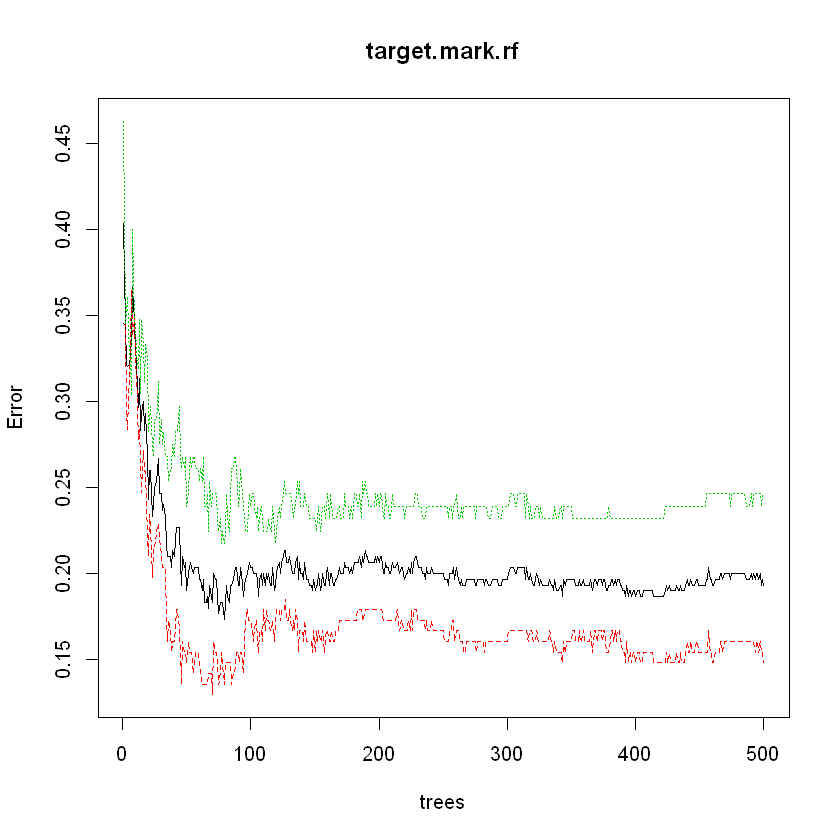

In [201]:
#Build Random Forest
if(!require(randomForest)){install.packages("randomForest")}
target.mark.rf = randomForest(r.forest.formula,ds.partitions$data.training,ntree=500,importance=T)
plot(target.mark.rf)

Variable importance plot is also a useful tool and can be plotted using varImpPlot function. Top 5 variables are selected and plotted based on Model Accuracy and Gini value. We can also get a table with decreasing order of importance based on a measure (1 for model accuracy and 2 node impurity)
http://dni-institute.in/blogs/random-forest-using-r-step-by-step-tutorial/


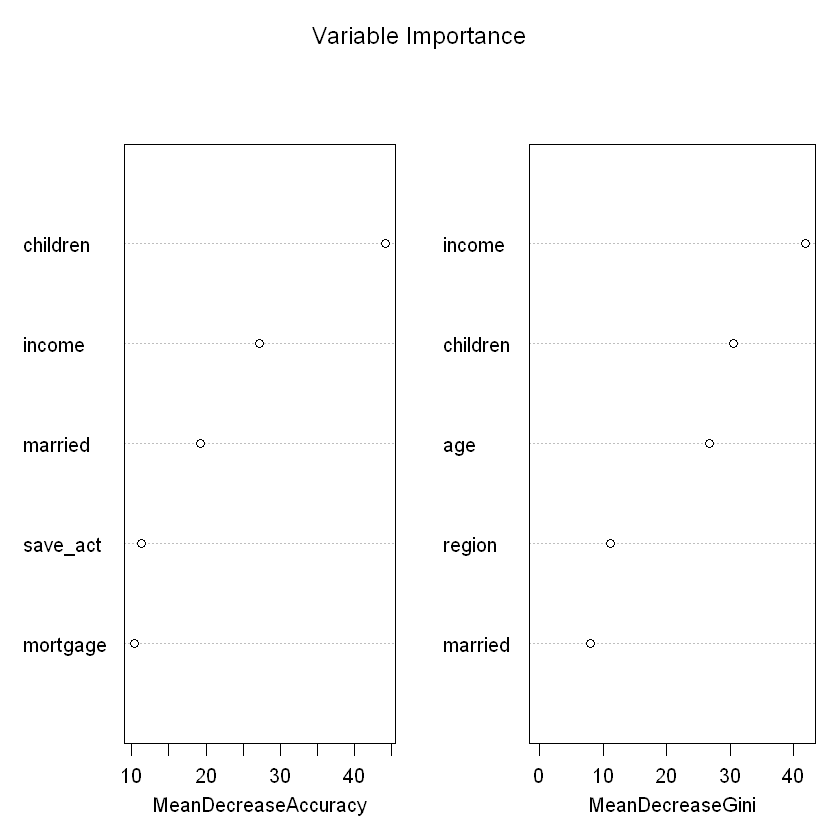

In [202]:
#Variable Importance Plot
varImpPlot(target.mark.rf, sort=T, main="Variable Importance", n.var=5)

In [203]:
#Variable Importance Table
attribute.importance = data.frame(importance(target.mark.rf,type=2))
attribute.importance$Attributes = row.names(attribute.importance)
attribute.importance[order(attribute.importance$MeanDecreaseGini,decreasing=T),]

,MeanDecreaseGini,Attributes
income,41.841914,income
children,30.455052,children
age,26.773258,age
region,11.069027,region
married,7.980907,married
mortgage,6.666860,mortgage
save_act,6.368033,save_act
sex,4.205623,sex
car,3.712925,car
current_act,3.342850,current_act


In [204]:
#Predict the response on the training data
ds.partitions$data.training$prediction = predict(target.mark.rf,ds.partitions$data.training)

In [205]:
#Confusion Matrix
if(!require(e1071)){install.packages("e1071")}
if(!require(caret)){install.packages("caret")}
confusionMatrix(data=ds.partitions$data.training$prediction,
                reference=ds.partitions$data.training$pep,
                positive='YES'
               )

Confusion Matrix and Statistics

          Reference
Prediction  NO YES
       NO  162   0
       YES   0 138
                                     
               Accuracy : 1          
                 95% CI : (0.9878, 1)
    No Information Rate : 0.54       
    P-Value [Acc > NIR] : < 2.2e-16  
                                     
                  Kappa : 1          
 Mcnemar's Test P-Value : NA         
                                     
            Sensitivity : 1.00       
            Specificity : 1.00       
         Pos Pred Value : 1.00       
         Neg Pred Value : 1.00       
             Prevalence : 0.46       
         Detection Rate : 0.46       
   Detection Prevalence : 0.46       
      Balanced Accuracy : 1.00       
                                     
       'Positive' Class : YES        
                                     

Confusion Matrix and Statistics

          Reference
Prediction NO YES
       NO  83   0
       YES  0  67
                                     
               Accuracy : 1          
                 95% CI : (0.9757, 1)
    No Information Rate : 0.5533     
    P-Value [Acc > NIR] : < 2.2e-16  
                                     
                  Kappa : 1          
 Mcnemar's Test P-Value : NA         
                                     
            Sensitivity : 1.0000     
            Specificity : 1.0000     
         Pos Pred Value : 1.0000     
         Neg Pred Value : 1.0000     
             Prevalence : 0.4467     
         Detection Rate : 0.4467     
   Detection Prevalence : 0.4467     
      Balanced Accuracy : 1.0000     
                                     
       'Positive' Class : YES        
                                     

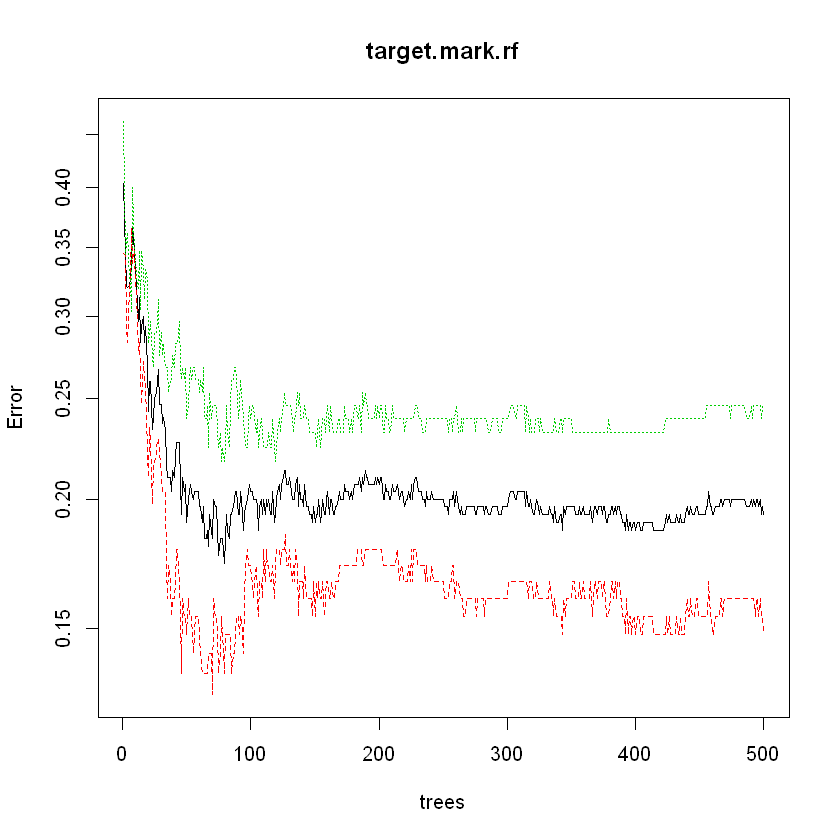

In [206]:
#Predict the response on the test data
ds.partitions$data.testing$prediction = predict(target.mark.rf,ds.partitions$data.testing)
#Confusion Matrix
confusionMatrix(data=ds.partitions$data.testing$prediction,
                reference=ds.partitions$data.testing$pep,
                positive='YES')
plot(target.mark.rf,log='y')


In [207]:
#This bit of plotting was found on the web at: 
# https://stats.stackexchange.com/questions/41443/how-to-actually-plot-a-sample-tree-from-randomforestgettree
options(repos='http://cran.rstudio.org')
have.packages <- installed.packages()
cran.packages <- c('devtools','plotrix','randomForest','tree')
to.install <- setdiff(cran.packages, have.packages[,1])
if(length(to.install)>0) install.packages(to.install)

library(devtools)
if(!('reprtree' %in% installed.packages())){
  install_github('araastat/reprtree')
}
for(p in c(cran.packages, 'reprtree')) eval(substitute(library(pkg), list(pkg=p)))

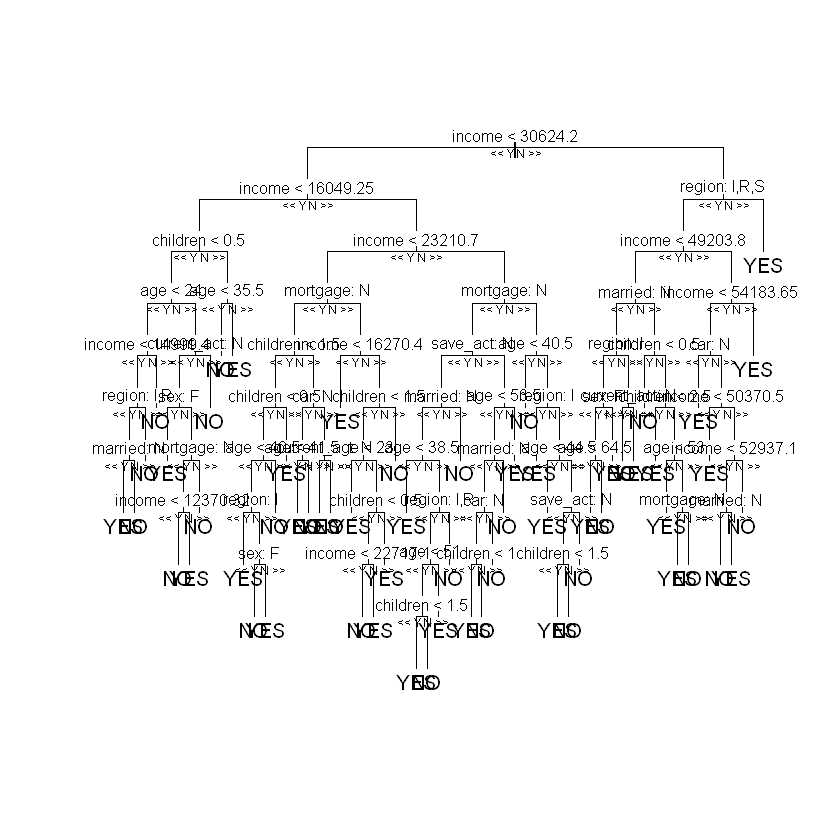

In [252]:
#Get a tree from the Random Forest Model
library(randomForest)
library(reprtree)
#png(filename='rf.tree.png', type='cairo-png', width= 1700, height= 1100)
reprtree:::plot.getTree(target.mark.rf)

#dev.off();
#realtree

# Utility Functions
* Build a Tree
* Plot a Tree - Fancy
* Build a Training Set
* Learn Trees
* Get PEP Predictions
* Get AUC of the Prediction
* Plot AUC

In [209]:
#function to build a list of training sets
build.training.sets = function(training.set,n.samples,size.sample){
  set.seed(908)   
  trainings = list()
  for(i in 1:n.samples){
    def.sample = sample_frac(training.set,size.sample,replace=TRUE)
    trainings[[i]] = def.sample
  } 
  return(trainings)
}

#classification Tree (Recursive Partitioning and Regression Trees)
build.tree = function(tree.formula,dataset){
  if(!require(rpart)){install.packages("rpart")}
  
  tree = rpart(tree.formula,data=dataset,method='class')
  return(tree)
}

#Plot tree function - fancy...
plot.tree.fancy = function(tree){
    if(!require(rpart.plot)){install.packages("rpart.plot")}
    if(!require(rattle)){install.packages("rattle")}
    if(!require(RColorBrewer)){install.packages("RColorBrewer")}

    fancyRpartPlot(tree)
}

#function learn tree Ti from Di
learn.tree = function(training.sets,testing.sets,num.tests){
    for(i in training.sets){
        
    }
    
    
    return(tree)
}
#Prediciton Function
get.pep.prediction = function(tree,dataset){
  #Predict
  predictions = predict(tree,dataset)
  actuals = ifelse(dataset$pep=='YES',"YES","NO")
  #Use a threshold to turn prediction probability into a prediction
  #Convert the predicted probabilites to predictions using a threshold
  threshold = .7
  predicted = ifelse(predictions[,2] > threshold, "YES", "NO")
  
  #confusion matrices
  cm = table(predicted,actuals,dnn = c("Predicted","Actual"))
  print(cm)
  
  #Calculate accuracy is defined as the fraction of predictions that are correct
  yes.count.actual = nrow(dataset[dataset$pep == 'YES',])
  no.count.actual = nrow(dataset[dataset$pep == 'NO',])
  yes.count.predicted = cm[1]
  no.count.predicted = cm[2,2]
  total.tests = nrow(dataset)
  total.correct.predictions = yes.count.predicted + no.count.predicted
  
  accuracy = total.correct.predictions/total.tests
  print(paste0("Accuracy: ","%",round(accuracy*100,1)))
  return(predictions)
}
#Get AUC
pep.prediction.auc = function(response,predictions){
  if(!require(pROC)){install.packages("pROC")}
  roc.obj = roc(response,predictions)
  return(auc(roc.obj))
}
#Plot AUC
plot.pep.auc = function(response,predictions){
  if(!require(pROC)){install.packages("pROC")}
  roc.obj = roc(response,predictions)
  scores.rounded = round(predictions,digits=1)
  roc.rounded = roc(response,scores.rounded)
  plot(roc.obj,print.auc=TRUE)
  lines(roc.rounded,col='red',type='b')
  text(0.4,0.43,labels=sprintf("AUC:%0.3f",auc(roc.rounded)),col='red')
}

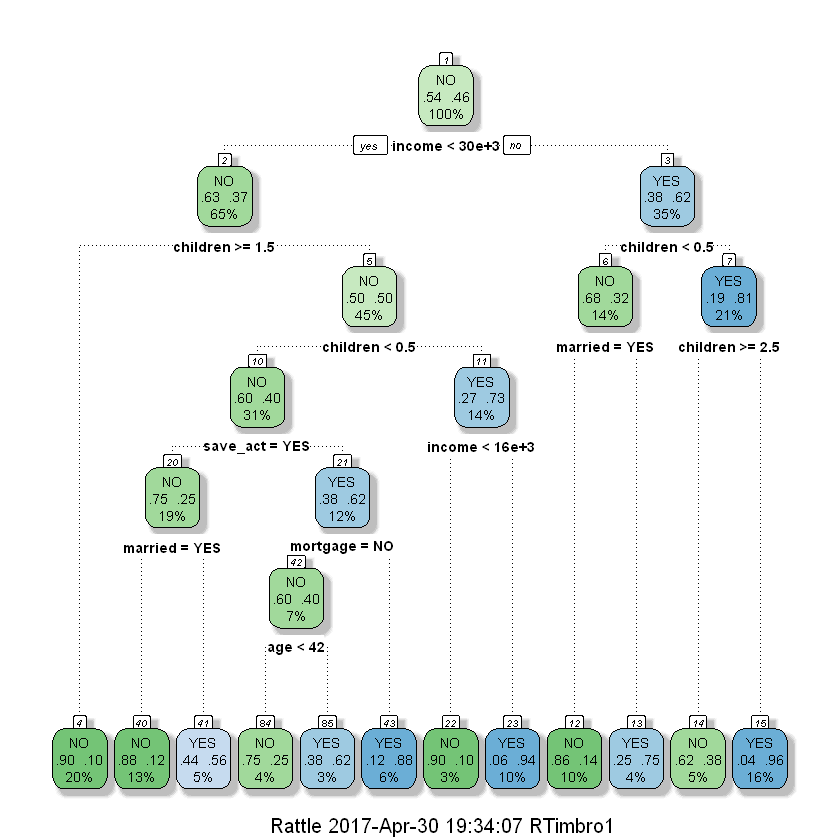

In [210]:
#Build a Decision tree based on all Attributes and plot the results
tree.all = build.tree(r.forest.formula,training.data)
plot.tree.fancy(tree.all)

         Actual
Predicted NO YES
      NO  79  20
      YES  4  47
[1] "Accuracy: %84"


[1] "AUC: 0.904333752922136"

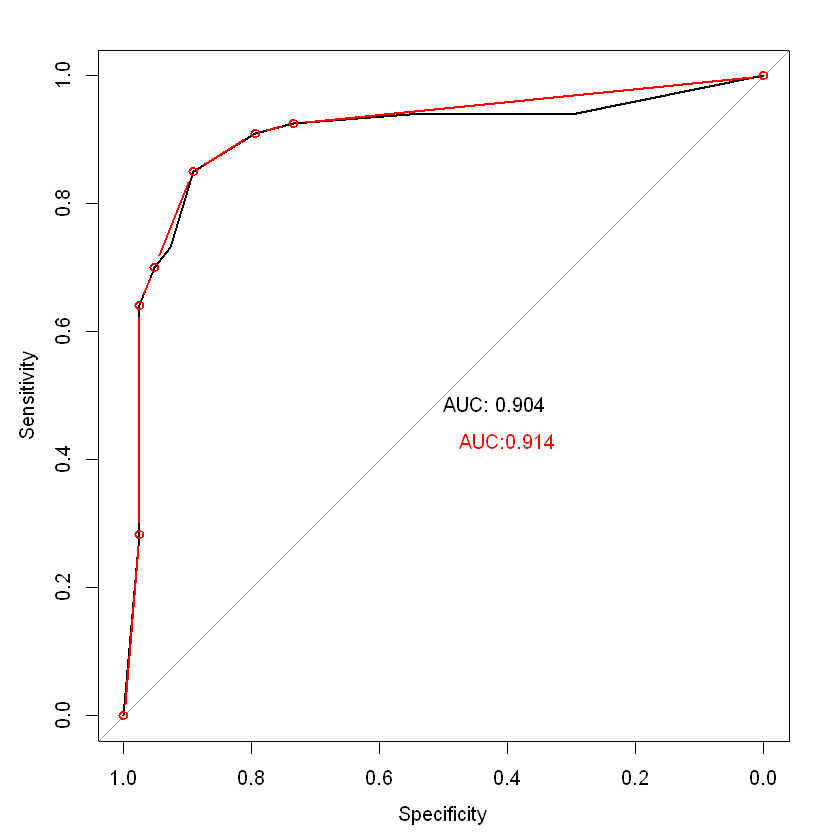

In [212]:
#Calculate Accuracy of training model predictions to test data set and the AUC, the area under the ROC Curve
pep.predictions = get.pep.prediction(tree.all,testing.data)
pep.auc = pep.prediction.auc(testing.data$pep,pep.predictions[,2])
paste0("AUC: ",pep.auc)
plot.pep.auc(testing.data$pep,pep.predictions[,2])

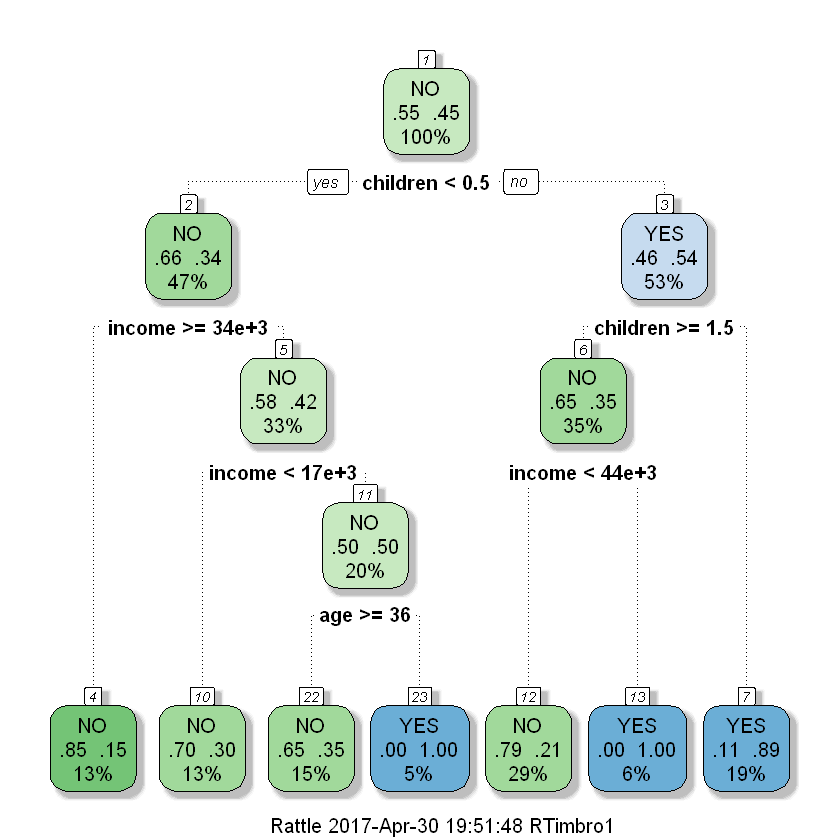

In [240]:
#Build a Decision tree based on all Attributes and plot the results
tree.best = build.tree(pep ~ income+children+age+region+mortgage+car+current_act,testing.data)
plot.tree.fancy(tree.best)

         Actual
Predicted NO YES
      NO  80  26
      YES  3  41
[1] "Accuracy: %80.7"


[1] "AUC: 0.831684948750225"

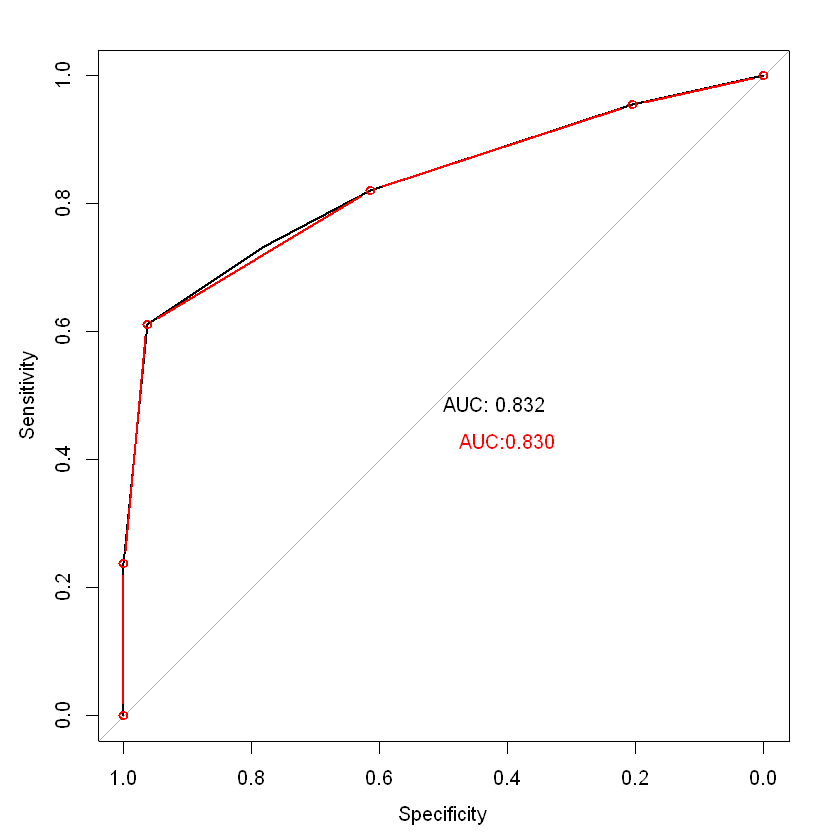

In [241]:
#Calculate Accuracy of training model predictions to test data set and the AUC, the area under the ROC Curve
pep.predictions = get.pep.prediction(tree.best,testing.data)
pep.auc = pep.prediction.auc(testing.data$pep,pep.predictions[,2])
paste0("AUC: ",pep.auc)
plot.pep.auc(testing.data$pep,pep.predictions[,2])

In [213]:
#Random Forest - D=Training set
training.sets = NULL
training.sample.size = .1
training.n.samples = 10
testing.sets = NULL
k.forest.trees = 10
n.tests = 100

for(i in 1:k.forest.trees){
  #build data set Di by sampling with replacement from D
  training.sets = build.training.sets(training.data,training.n.samples,training.sample.size)
  #learn tree Ti from Di
   
}
length(training.sets)
head(training.sets[[i]])


#Bagging - Random sample of training set
#sample(ds.partitions$data.training,replace = TRUE)

[1] 10

,age,sex,region,income,married,children,car,save_act,current_act,mortgage,pep
155,41,MALE,RURAL,23356.1,NO,2,YES,NO,NO,NO,NO
134,64,FEMALE,SUBURBAN,36436.4,YES,0,YES,NO,YES,NO,NO
342,66,MALE,RURAL,48346.1,YES,1,YES,YES,NO,NO,YES
120,64,FEMALE,RURAL,45765.0,YES,3,YES,YES,YES,NO,YES
454,59,FEMALE,RURAL,51284.3,NO,0,YES,YES,YES,YES,NO
554,49,FEMALE,SUBURBAN,39358.3,YES,0,YES,NO,NO,YES,NO
